In [1]:
# Add dependencies
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [6]:
# Load data
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')
PG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,7.820023
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,7.757339
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,7.647637
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,7.663309
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,7.631968
...,...,...,...,...,...,...
2022-10-31,135.669998,134.259995,135.199997,134.669998,8346300.0,134.669998
2022-11-01,136.279999,133.839996,134.699997,134.880005,6428300.0,134.880005
2022-11-02,136.539993,132.809998,134.720001,132.940002,7318100.0,132.940002


In [9]:
# Calculate daily Simple Rate of Return
PG['simple_return'] = (PG['Adj Close']/PG['Adj Close'].shift(1)) - 1
PG[['Adj Close','simple_return']]

,Adj Close,simple_return
Date,,
1995-01-03,7.820023,NaN
1995-01-04,7.757339,-0.008016
1995-01-05,7.647637,-0.014142
1995-01-06,7.663309,0.002049
1995-01-09,7.631968,-0.004090
...,...,...
2022-10-31,134.669998,-0.004067
2022-11-01,134.880005,0.001559
2022-11-02,132.940002,-0.014383


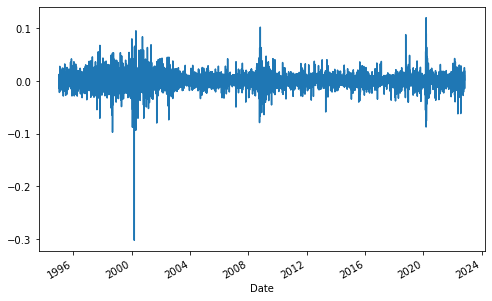

In [12]:
# Plot the result
PG['simple_return'].plot(figsize=(8,5))
plt.show()

In [13]:
# Calculate average of daily Simple Rate of Returns
avg_daily_return = PG['simple_return'].mean()
avg_daily_return

0.0005060679870141808

In [18]:
# Calculate approximate annually Simple Rate of Returns based on the average
avg_annually_return = avg_daily_return * 250
print(f'{round(avg_annually_return,5)*100}%')

12.652%


In [21]:
# Calculate log RoR
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
PG[['Adj Close','simple_return','log_return']]

,Adj Close,simple_return,log_return
Date,,,
1995-01-03,7.820023,NaN,NaN
1995-01-04,7.757339,-0.008016,-0.008048
1995-01-05,7.647637,-0.014142,-0.014243
1995-01-06,7.663309,0.002049,0.002047
1995-01-09,7.631968,-0.004090,-0.004098
...,...,...,...
2022-10-31,134.669998,-0.004067,-0.004076
2022-11-01,134.880005,0.001559,0.001558
2022-11-02,132.940002,-0.014383,-0.014488


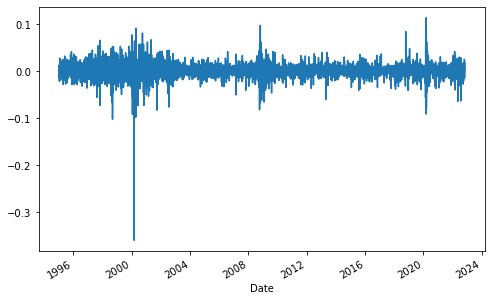

In [24]:
# Plot the result
PG['log_return'].plot(figsize = (8,5))
plt.show()

In [25]:
# Calculate average Log RoR
avg_daily_log_return = PG['log_return'].mean()
avg_daily_log_return

0.0004057096730330309

In [26]:
# Calculate approximate annually Log Rate of Returns based on the average
avg_annually_log_return = avg_daily_log_return * 250
print(f'{round(avg_annually_log_return,5)*100}%')

10.143%
